<a href="https://colab.research.google.com/github/rih28/dataAnalytics/blob/master/part2_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are many different areas for you to look into, but in this course we will concentrate on linear regression and Deep Learning Neural Networks. Some of these areas are:

- Clustering
- Association Rules
- Logistic Regression
- Classification
- Time Series Analysis

And much more...

Having done some initial exploration of data, we are now going to further investigate the statistical modelling technique called linear regression.

There are numerous types of regression analysis but, in general, they are used to explain the influence that a set of variables has on the outcome of another variable of interest. Another name for the outcome variable is the dependent variable as it ‘depends’ on the other variables which are known as independent variables. Ultimately, as analysts, we use regression to answer our research questions.

Linear regression is an analytical technique used to model the relationship between several input variables and a continuous outcome variable. A key assumption is that the relationship between an input variable and the outcome variable is linear. This assumption may appear restrictive but as mentioned earlier it is often possible to transform the input or outcome variables to achieve a linear relationship between the modified input and outcome variables.

Ohm’s law is an example of a linear model and it is considered deterministic in the sense that if the input values are known, the value of the outcome variable is precisely determined. A linear regression model is a probabilistic one that accounts for the randomness that can affect any particular outcome. Based on known input values, a linear regression model provides the expected value of the outcome variable based on the values of the input variables, but some uncertainty may remain in predicting any particular outcome. Thus, linear regression models are useful in physical and social science applications where there may be considerable variation in a particular outcome based on a given set of input values. After presenting possible linear regression use cases, the foundations of linear regression modelling are provided.


**2.2.1 Applications of linear regression**

The technique is used in a multitude of ways in real world research. For example:

- Real estate (which we will look at in particular detail later): A simple linear regression analysis can be used to model residential home prices as a function of the home's living area. We do this for the state of California.
- Demand forecasting: Our assignment and main tutorial set are both based upon demand forecasting. So, using prior data to predict the number of taxi trips on a particular day, for example.
- Medical: A linear regression model can be used to analyze the effect of a proposed radiation treatment on reducing tumor sizes.

**What is linear regression?**

A linear regression model makes the assumption that there is a linear relationship between the x and y variables.
In equation form this looks like:

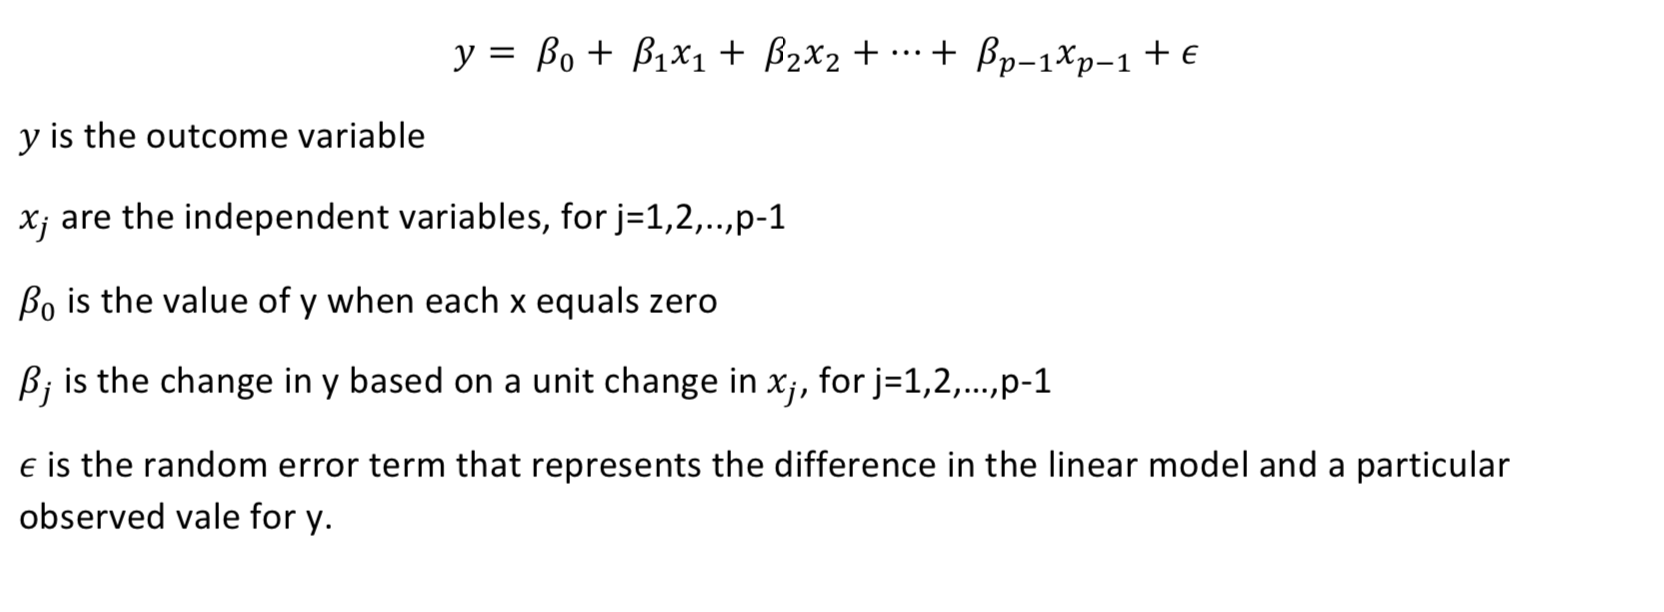

Using the example of our OECD Life Satisfaction Data, Value is the outcome variable and the input variable is GDPPerCapita. Simplifying the expected pattern, we may assume that the countries where GDP Per Capita is higher, life satisfaction will be better.

We can investigate this more scientifically using statistical analysis.

In the linear model, the βj's represent the unknown p parameters. The estimates for these unknown parameters are chosen so that, generally, the model gives a good estimate of the Life Satisfaction score based on GDPPerCapita. That is to say, the fitted model should minimise the overall error between the linear model and the actual observations. Ordinary Least Squares (OLS) is a common technique to estimate parameters.

A brief illustration of how OLS works using the OECD Life Satisfaction data shows using one of the input variables for the Life Satisfaction outcome variable.

First illustrated in a plot:

In [1]:
# import a CSV file of life satisfaction data.
ls <- read.csv("https://raw.githubusercontent.com/rih28/dataAnalytics/master/LifeSatisfactionData.csv")

In [3]:
head(ls)

,LOCATION,Country,Value,GDPPerCapita
,<fct>,<fct>,<dbl>,<dbl>
1,AUS,Australia,7.3,48899.12
2,AUT,Austria,7.1,48004.66
3,BEL,Belgium,6.9,45046.94
4,BRA,Brazil,6.5,15241.73
5,CAN,Canada,7.4,46437.16
6,CHL,Chile,6.5,24112.94


In [4]:
summary(ls)

    LOCATION       Country       Value        GDPPerCapita   
 AUS    : 1   Australia: 1   Min.   :5.100   Min.   : 15242  
 AUT    : 1   Austria  : 1   1st Qu.:5.975   1st Qu.: 29218  
 BEL    : 1   Belgium  : 1   Median :6.550   Median : 39508  
 BRA    : 1   Brazil   : 1   Mean   :6.567   Mean   : 41450  
 CAN    : 1   Canada   : 1   3rd Qu.:7.300   3rd Qu.: 48308  
 CHE    : 1   Chile    : 1   Max.   :7.600   Max.   :104003  
 (Other):30   (Other)  :30                                   

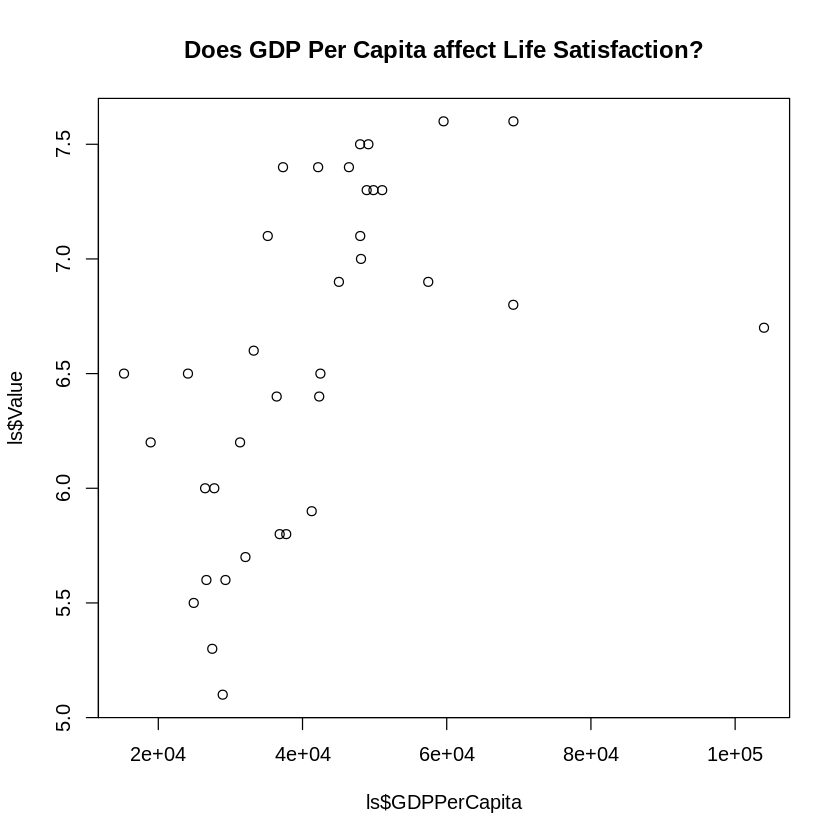

In [9]:
plot(ls$GDPPerCapita, ls$Value, main="Does GDP Per Capita affect Life Satisfaction?")

Using linear regression we are trying to find the line that best fits the relationship between the x and y variables. OLS is a technique which has the goal of finding the line of best fit that minimises the sum of the squares of the difference between each point and the line in the vertical direction.

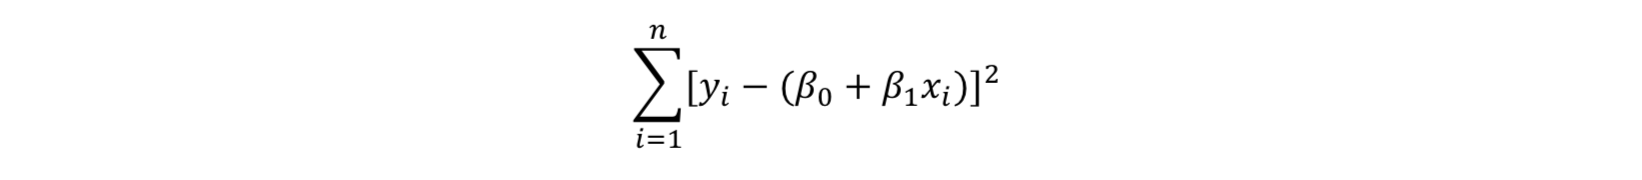

The figure a few cells down shows the same plot with the line of best fit shown:

In [6]:
results <- lm(ls$Value ~ ls$GDPPerCapita)

In [7]:
summary(results)


Call:
lm(formula = ls$Value ~ ls$GDPPerCapita)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3462 -0.6241  0.0605  0.5395  0.9316 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.586e+00  2.822e-01  19.798  < 2e-16 ***
ls$GDPPerCapita 2.365e-05  6.327e-06   3.738  0.00068 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.625 on 34 degrees of freedom
Multiple R-squared:  0.2913,	Adjusted R-squared:  0.2705 
F-statistic: 13.98 on 1 and 34 DF,  p-value: 0.0006805


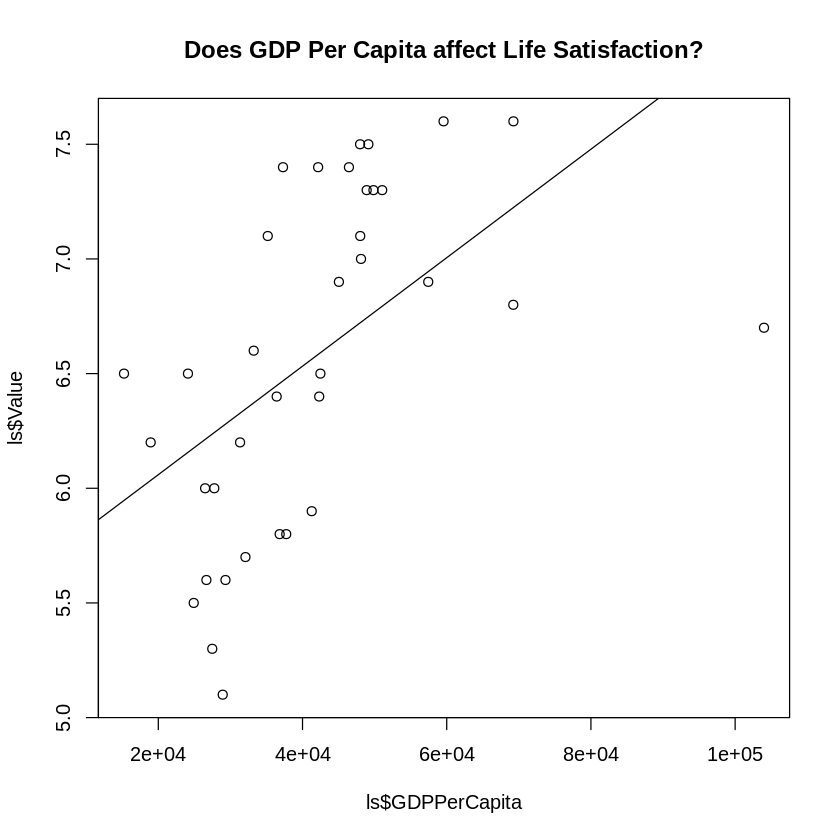

In [12]:
plot(ls$GDPPerCapita, ls$Value, main="Does GDP Per Capita affect Life Satisfaction?")
# draw line of best fit
abline(lm(ls$Value ~ ls$GDPPerCapita))

We have seen how to find the best linear fit to a set of observations. Nevertheless, there are further assumptions that can be made on the error term which may provide further capabilities in utilising the linear regression model.

Linear Regression Model (with normally distributed errors)

Generally, in linear regression analyses, we assume that the error term is a normally distributed random variable with mean equal to zero and constant variance. The equation is shown below:

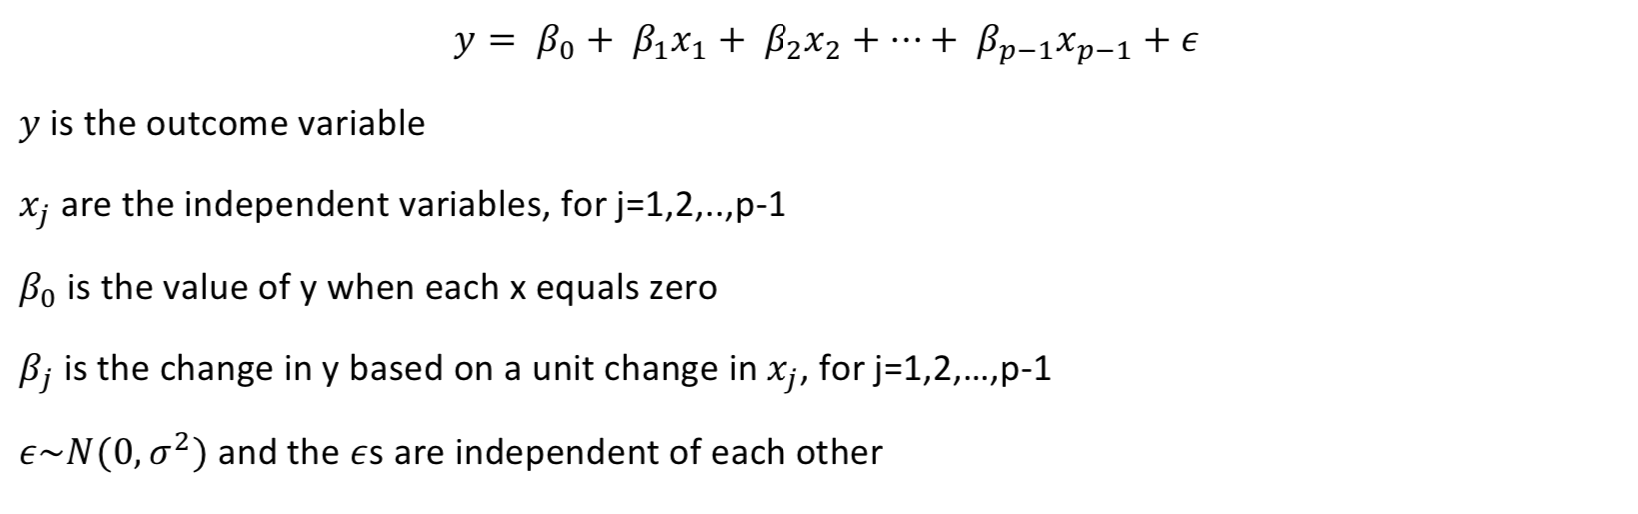



Using the Life Satisfaction Data we can illustrate the linear regression model.

The outcome variable here is Value which is a life satisfaction score. The input variables are GDPPerCapita. There is also the country id variable:



In [13]:
# import a CSV file of life satisfaction data.
ls <- read.csv("https://raw.githubusercontent.com/rih28/dataAnalytics/master/LifeSatisfactionData.csv")
head(ls)
summary(ls)

,LOCATION,Country,Value,GDPPerCapita
,<fct>,<fct>,<dbl>,<dbl>
1,AUS,Australia,7.3,48899.12
2,AUT,Austria,7.1,48004.66
3,BEL,Belgium,6.9,45046.94
4,BRA,Brazil,6.5,15241.73
5,CAN,Canada,7.4,46437.16
6,CHL,Chile,6.5,24112.94


    LOCATION       Country       Value        GDPPerCapita   
 AUS    : 1   Australia: 1   Min.   :5.100   Min.   : 15242  
 AUT    : 1   Austria  : 1   1st Qu.:5.975   1st Qu.: 29218  
 BEL    : 1   Belgium  : 1   Median :6.550   Median : 39508  
 BRA    : 1   Brazil   : 1   Mean   :6.567   Mean   : 41450  
 CAN    : 1   Canada   : 1   3rd Qu.:7.300   3rd Qu.: 48308  
 CHE    : 1   Chile    : 1   Max.   :7.600   Max.   :104003  
 (Other):30   (Other)  :30                                   

Shown earlier, it is possible to create a scatterplot matrix to gleam more information about the pair- wise relationships of the variables. We begin within the assumption that there is a linear relationship between the outcome variable and the input variables.

In [14]:
library(lattice)

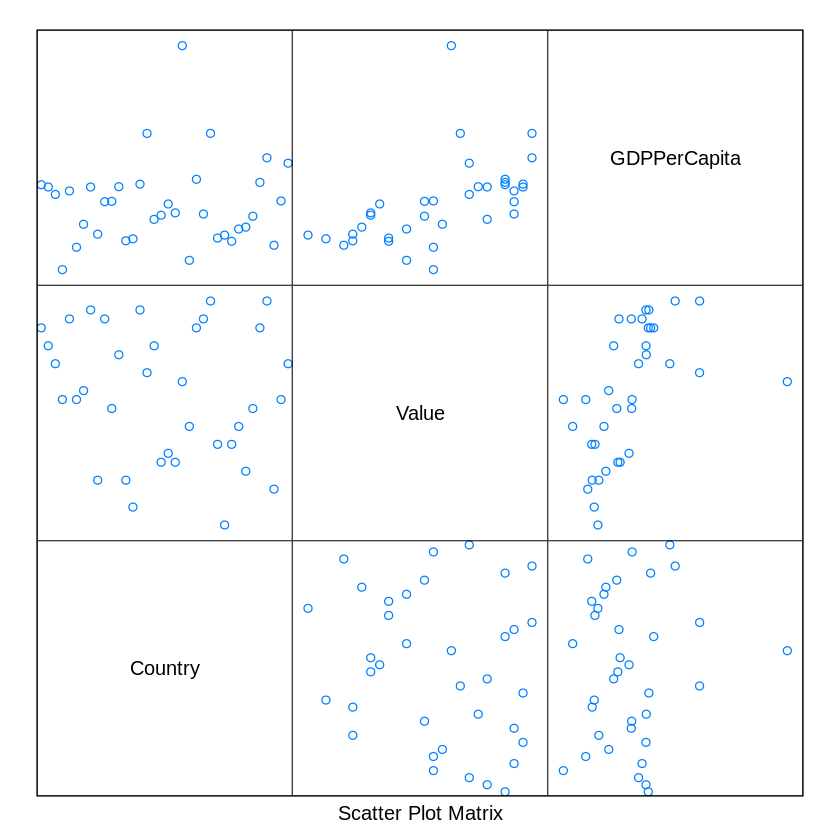

In [15]:
splom(~ls[c(2:4)], groups=NULL, data=ls,
axis.line.tck=0, axis.text.alpha=0)

Take some time to look at the patterns observed in the scatterplots.

This graphical illustration helps give a qualitative comprehension of the data. By fitting a linear regression and applying the normality assumption to the error term we can gain a quantitative understanding of the data.

In [18]:
results <- lm(ls$Value~ls$GDPPerCapita, ls)
summary(results)


Call:
lm(formula = ls$Value ~ ls$GDPPerCapita, data = ls)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3462 -0.6241  0.0605  0.5395  0.9316 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.586e+00  2.822e-01  19.798  < 2e-16 ***
ls$GDPPerCapita 2.365e-05  6.327e-06   3.738  0.00068 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.625 on 34 degrees of freedom
Multiple R-squared:  0.2913,	Adjusted R-squared:  0.2705 
F-statistic: 13.98 on 1 and 34 DF,  p-value: 0.0006805


The intercept term is implicitly included in the model. The lm() function performs the parameter estimation for the parameters βj(j=0,1,2,3) using ordinary least squares and provides several useful calculations and results that are stored in the variable called results in this example.

Also, included in the output are some statistics on the residuals. They are the observed values of the error term for each observation (country’s life satisfaction score) and are defined for i=1,2,....n.

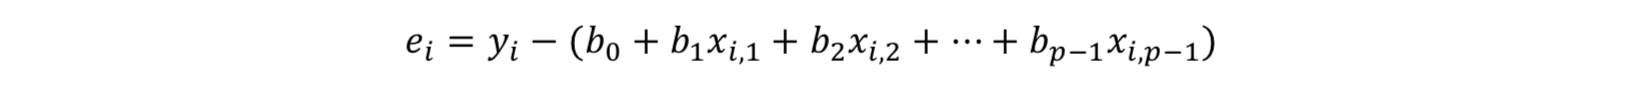

We can see that the residuals range from approximately -1.3462 to +0.9316, the median is 0.0605 (close to zero). Residuals are assumed to be normally distributed with a mean near zero and a constant variance.

Looking more closely at the output, within the coefficients under the Estimate column we are provided with the OLS estimates of the coefficients in the fitted linear regression model. In general, the (Intercept) corresponds to the estimated response variable when all the input variables equal zero. Shown above, the intercept in this example corresponds to an estimated Life Satisfaction Score of 5.586 for a zero GDP per capita (bear in mind this particular ‘country’ does not exist. The minimum and maximum GDP per capita illustrate this). It could be said, therefore, that misleading results may be obtained when using linear regression to estimate outcomes for values of independent variables not representative within the dataset to train the model.

There is some ambiguity or sampling error around the coefficient estimates because the values of the coefficients are only approximate based on the observed satisfaction scores in the sample. The Std.Error column shows the sampling error associated with each coefficient and this can be used to carry out a hypothesis test which works out if the coefficient is statistically different from zero. That is to say, if a coefficient is not statistically different from zero, the coefficient and the associated measure in the model needs to be excluded from the model. Above we can see that the associated hypothesis tests’ p-values are very small for the GDPPerCapita parameters, therefore, the null hypothesis can be rejected. In the next example we see what happens when this is not the case.

Finally, the results also show summary statistics and tests on the model. The residual standard error is the standard deviation of the observed residuals. Together with the degrees of freedom, this can be used to explore the variance of the assumed normally distributed error terms. Another figure to take note of is the R-squared (R2). This measures the overall variation in the data that is explained by the model. Ranging from 0 to 1, the closer the figure is to 1 the more the model explains the data. The R2 can increase by adding more variables to your model but be careful not to overfit (adding more variables but not improve the explanatory power of the model. This is where the adjusted R2 gives a truer figure as it takes into account the number of parameters included in the model. These figures do not vary by much. The F-statistic is a test for the overall model, as opposed to the individual t-tests which determined the significance of each parameter. The F-statistic also has its own p-value, in the above case for the Life Satisfaction Data it is also very small therefore demonstrating the null hypothesis can be rejected.



We will briefly look at another example using a dataset which contains data on NYC taxi rides. 


In [20]:
fv <- read.csv("https://raw.githubusercontent.com/rih28/dataAnalytics/master/finalValsCSV.csv")

In [21]:
head(fv)

,id,dayid,TMIN,TMAX,PRCP,numtrips
,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,2,26,40,0,412630
2,2,3,22,33,0,393001
3,3,4,24,32,0,441233
4,4,5,30,37,0,478437
5,5,6,32,42,0,473804
6,6,7,34,46,0,403667


In [22]:
summary(fv)

       id          dayid            TMIN            TMAX            PRCP       
 Min.   :  1   Min.   :1.000   Min.   :11.00   Min.   :20.00   Min.   :0.0000  
 1st Qu.: 92   1st Qu.:2.000   1st Qu.:35.00   1st Qu.:47.00   1st Qu.:0.0000  
 Median :183   Median :4.000   Median :49.00   Median :64.00   Median :0.0000  
 Mean   :183   Mean   :3.995   Mean   :48.52   Mean   :62.38   Mean   :0.1269  
 3rd Qu.:274   3rd Qu.:6.000   3rd Qu.:64.00   3rd Qu.:79.00   3rd Qu.:0.0400  
 Max.   :365   Max.   :7.000   Max.   :83.00   Max.   :98.00   Max.   :4.1600  
    numtrips     
 Min.   :195405  
 1st Qu.:448491  
 Median :479913  
 Mean   :474465  
 3rd Qu.:510530  
 Max.   :584812  

The outcome variable here is numtrips which is the number of taxi rides. The input variables are PRCP(rain), TMAX and TMIN (maximum and minimum temperature) and dayid (day of the week). There is also the id variable for the taxi ride in question.

Again, it is useful to create a scatterplot matrix to gleam more information about the pair-wise relationships of the variables. We begin within the assumption that there is a linear relationship between the outcome variable and the input variables.

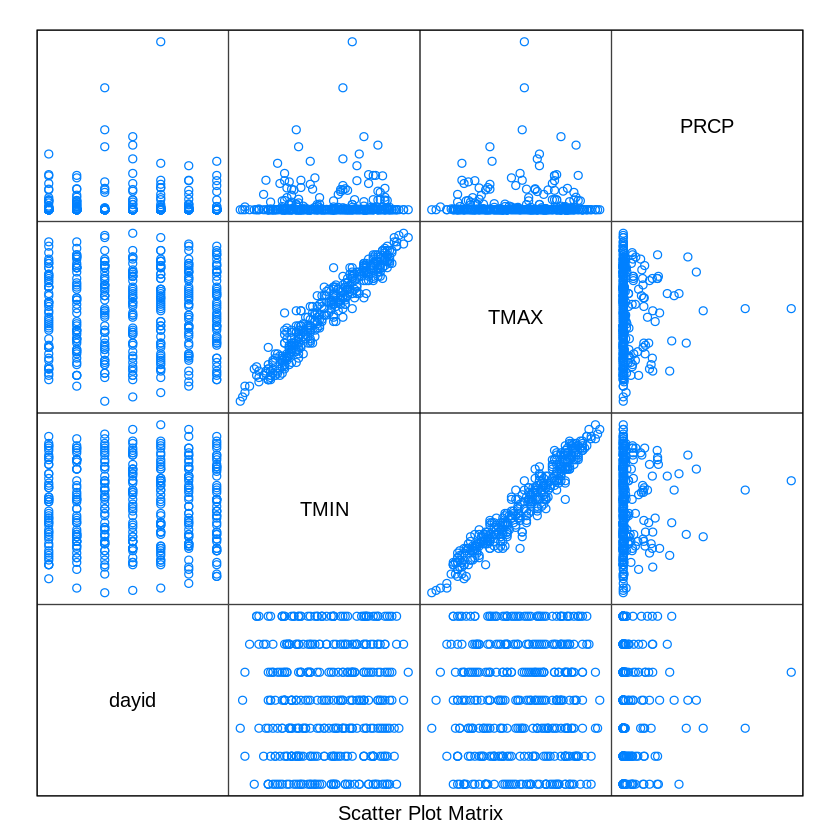

In [23]:
library(lattice)
splom(~fv[c(2:5)], groups=NULL, data=fv, axis.line.tck=0, axis.text.alpha=0)

The scatterplots look quite different to the life satisfaction data. To further illustrate the differences we will attempt to fit a linear regression model to gain quantitative understanding of the data.

In [24]:
results <- lm(numtrips~PRCP + dayid + TMAX + TMIN, fv)

In [25]:
summary(results)


Call:
lm(formula = numtrips ~ PRCP + dayid + TMAX + TMIN, data = fv)

Residuals:
    Min      1Q  Median      3Q     Max 
-281490  -22162    5987   36055   95113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 480067.0    12707.0  37.780  < 2e-16 ***
PRCP         11360.8     7570.9   1.501 0.134340    
dayid         5143.5     1438.9   3.575 0.000399 ***
TMAX           868.3      601.4   1.444 0.149636    
TMIN         -1684.8      656.2  -2.568 0.010640 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 54840 on 360 degrees of freedom
Multiple R-squared:  0.08898,	Adjusted R-squared:  0.07886 
F-statistic: 8.791 on 4 and 360 DF,  p-value: 8.826e-07


We can use the skills we learned above to interpret this linear regression model output.

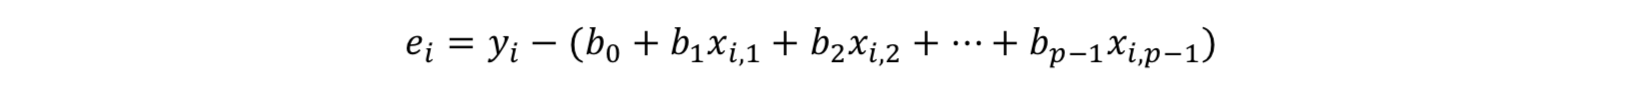

We can see that the residuals range from approximately -281490 to +95113, the median is 5987. In a different way to the life satisfaction score model, this median is not close to zero. This indicates that the residuals are not normally distributed. Another difference with this model is that not all of the independent variables are significant. For example, PRCP and TMAX have larger p-values and therefore, when they are zero they contribute nothing to the estimate of the number of taxi trips.

As described above, we can drop the variables which are not significant and rerun the model without them. As displayed below:

In [26]:
results <- lm(numtrips~dayid + TMIN, fv)

In [27]:
summary(results)


Call:
lm(formula = numtrips ~ dayid + TMIN, data = fv)

Residuals:
    Min      1Q  Median      3Q     Max 
-281448  -23056    7013   37521   90882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 491523.1    10422.2  47.161  < 2e-16 ***
dayid         4960.7     1439.1   3.447 0.000633 ***
TMIN          -759.9      170.9  -4.447 1.16e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 54980 on 362 degrees of freedom
Multiple R-squared:  0.07934,	Adjusted R-squared:  0.07426 
F-statistic:  15.6 on 2 and 362 DF,  p-value: 3.176e-07


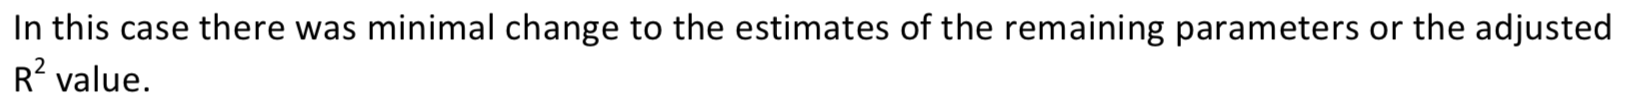

In real life research there is a lot of trial and error in model fitting and variables are added and removed as analysts explore the effects on the overall results. In terms of the tutorials, this makes sense and is the reason we want to assess the linear regression model against a DNN regressor as the model clearly does not fit a linear regression model well.